# Generate a Digital Elevation Model from a point cloud

<b>This Jupyter-Notebook is part of a master thesis with the topic:<br>
    <i>Analysis of deep learning methods for semantic segmentation of photogrammetric point clouds from aerial images</i><br>
&copy; Markus Hülsen, Matr.-Nr. 6026370<br>
Date: 27.06.2023</b>

This notebook converts a point cloud observed by airborne laserscanning to a Digital Elevation Model (DEM)

First of all we have to import the meccessary libarays

In [1]:
import numpy as np
import laspy
import pyvista as pv
import os
import pandas as pd
from tqdm.notebook import tqdm 

Take a look to the acutal laspy Version.

In [2]:
laspy.__version__

'2.4.1'

First we need to define the path were the data is stored.

In [3]:
# path where the data ist stored
data_path = '../../Daten/Datensatz_H3D/'
# sub-folder which includes different acquisition dates and types like 'DIM_2016', 'DIM_2019', 'DIM_2022', 'ALS2016', ...
data = 'ALS_2016'

# save files that are in laz-format
lst_files = []
for file in os.listdir(data_path + data):
    if file.endswith('.las'):
        lst_files.append(data_path + data + '/' + file)
print(lst_files)

['../../Daten/Datensatz_H3D/ALS_2016/554000_5798000.las', '../../Daten/Datensatz_H3D/ALS_2016/554000_5799000.las', '../../Daten/Datensatz_H3D/ALS_2016/554000_5800000.las', '../../Daten/Datensatz_H3D/ALS_2016/554000_5801000.las', '../../Daten/Datensatz_H3D/ALS_2016/555000_5798000.las', '../../Daten/Datensatz_H3D/ALS_2016/555000_5799000.las', '../../Daten/Datensatz_H3D/ALS_2016/555000_5800000.las', '../../Daten/Datensatz_H3D/ALS_2016/555000_5801000.las', '../../Daten/Datensatz_H3D/ALS_2016/556000_5798000.las', '../../Daten/Datensatz_H3D/ALS_2016/556000_5799000.las', '../../Daten/Datensatz_H3D/ALS_2016/556000_5800000.las', '../../Daten/Datensatz_H3D/ALS_2016/556000_5801000.las']


We want to use the first las-path

In [4]:
file = lst_files[0]
file

'../../Daten/Datensatz_H3D/ALS_2016/554000_5798000.las'

Function to visualize the DEM.

In [5]:
import matplotlib.pyplot as plt

In [6]:
def plot_dem(dem, figsize=(8, 8)):
    
    # change font size
    plt.rcParams['font.size'] = 18

    # Create a new figure and axis
    fig, ax = plt.subplots(figsize=figsize)

    # Plot the DEM as a 2D image
    im = ax.imshow(dem, cmap='terrain')

    # Add a colorbar to the plot
    cbar = ax.figure.colorbar(im, ax=ax, orientation='vertical', pad=0.05)
    cbar.ax.set_ylabel('Elevation (m)', rotation=270, va='bottom')

    # Set the x and y axis labels and limits
    ax.set_xlabel('Column')
    ax.set_ylabel('Row')
    ax.set_xlim(0, dem.shape[1])
    ax.set_ylim(dem.shape[0], 0)

    # Show the plot
    plt.show()

## Import
Import of the point cloud.

In [7]:
def import_las_to_Dataframe(path):
    with laspy.open(path) as f:
        las = f.read()
    
    # read coordinates from las
    x = np.array(las.x)
    y = np.array(las.y)
    z = np.array(las.z)

    df = pd.DataFrame({'X':x,'Y':y,'Z':z},index=np.arange(len(x)))

    for i in range(3, len(las.point_format.dimensions)):
        dim = las.point_format.dimensions[i].name
        df[dim] = np.array(las[dim])
     
    return df

Import the selected las-file.

In [8]:
# Load the LAS file
df = import_las_to_Dataframe(file)
df

,X,Y,Z,intensity,return_number,number_of_returns,scan_direction_flag,edge_of_flight_line,classification,synthetic,key_point,withheld,scan_angle_rank,user_data,point_source_id,gps_time,red,green,blue
0,554000.015,5798276.818,76.139,151,1,1,0,0,6,0,0,0,-25,0,151,135595.999801,0,0,0
1,554000.011,5798295.181,68.745,22,1,2,0,0,13,0,0,0,-25,0,151,135595.774691,0,0,0
2,554000.016,5798304.475,64.332,124,1,1,0,0,2,0,0,0,-26,0,151,135595.658257,0,0,0
3,554000.002,5798307.784,64.301,161,3,3,0,0,2,0,0,0,-26,0,151,135595.619450,0,0,0
4,554000.013,5798310.404,74.733,5,2,2,0,0,13,0,0,0,-26,0,151,135595.596193,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10197099,554012.000,5798864.000,62.030,0,0,0,0,0,8,0,0,0,0,0,1,0.000000,0,0,0
10197100,554010.000,5798866.000,62.030,0,0,0,0,0,8,0,0,0,0,0,1,0.000000,0,0,0
10197101,554010.000,5798864.000,62.030,0,0,0,0,0,8,0,0,0,0,0,1,0.000000,0,0,0
10197102,554008.000,5798864.000,62.030,0,0,0,0,0,8,0,0,0,0,0,1,0.000000,0,0,0


## Filtering
Only consider points with class `ground`.<br>
Ignore other values than `X`, `Y` and `Z`

In [9]:
df = df.loc[df.classification == 2].loc[:,'X':'Z']
df

,X,Y,Z
2,554000.016,5798304.475,64.332
3,554000.002,5798307.784,64.301
6,554000.010,5798321.194,64.193
8,554000.014,5798384.087,64.465
10,554000.004,5798424.204,64.042
...,...,...,...
10195544,554999.947,5798401.143,71.024
10195545,554999.925,5798397.473,71.086
10195546,554999.947,5798396.355,71.069
10195547,554999.937,5798381.268,71.134


Reduce size of pointcloud

In [10]:
# Bounding Box
bbox_x1 = df.X.min()
bbox_y1 = df.Y.min()
bbox_x2 = (df.X.max() + df.X.min()) #/ 2
bbox_y2 = (df.Y.max() + df.Y.min()) #/ 2

# Select Point inside of Bounding Box
df = df.loc[(df.X >=bbox_x1) & (df.Y >= bbox_y1) & (df.X <=bbox_x2) & (df.Y <= bbox_y2)]

print('Check Results')
print('X min:', df.X.min(), 'X max:', df.X.max())
print('Y min:', df.Y.min(), 'Y max:', df.Y.max())

df

Check Results
X min: 554000.0 X max: 554999.968
Y min: 5798000.0 Y max: 5798999.749


,X,Y,Z
2,554000.016,5798304.475,64.332
3,554000.002,5798307.784,64.301
6,554000.010,5798321.194,64.193
8,554000.014,5798384.087,64.465
10,554000.004,5798424.204,64.042
...,...,...,...
10195544,554999.947,5798401.143,71.024
10195545,554999.925,5798397.473,71.086
10195546,554999.947,5798396.355,71.069
10195547,554999.937,5798381.268,71.134


## Get Bound Box 
Now we want to get the bounding box of the point cloud.

In [11]:
# Get the min and max coordinates of the point cloud
min_x, max_x = df.X.min(), df.X.max()
min_y, max_y = df.Y.min(), df.Y.max()

print('Minimum X: ', min_x, '\tMinimum Y: ', min_y)
print('Maximum X: ', max_x, '\tMaximum Y: ', max_y)

Minimum X:  554000.0 	Minimum Y:  5798000.0
Maximum X:  554999.968 	Maximum Y:  5798999.749


## Number of rows and colums
Get number of columns and rows with respect to the Bounding Box and a defined <b>cellsize</b>

In [12]:
# define a cellsize
cellsize = 1 # meter

# Calculate the number of cells in the x and y directions
num_cols = int((max_x - min_x) / cellsize) + 1
num_rows = int((max_y - min_y) / cellsize) + 1

print('number of columns: ', num_cols, '\tnumber of rows: ', num_rows)

number of columns:  1000 	number of rows:  1000


In [13]:
# Initialize the DEM as a numpy array of zeros
dem = np.zeros((num_rows, num_cols), dtype=np.float32)

## Generate DEM
The following function calculates the digital elevation model based on a DataFrame, which contains all the ground points.

As input the function needs a DataFrame with the ground points and the cellsize we want to have in out DEM.<br>
The function returns a numpy array with the calculated DEM.

The function works as follows:
1. calculate the Bounding Box of the point cloud 
2. based on the Bounding B, calculate the number of column and rows of the DEM
3. Get two one dimensional numpy arrays with the x- and y-coords of every pixel/cell of the DEM
4. Get the X- and Y-indices of every Point which maps a point to the position inside of the DEM
5. Initalize a Numpy Array for the DEM with zeros and a Numpy Array for the counts
6. Summerize the Z-Coordinates at the DEM-array
7. Count the points inside a cell
8. Devide the DEM-array by the counts to get a mean value
9. return the numpy array.

In [14]:
def dataframe_to_dem(point_df, cell_size):
    # Calculate the minimum and maximum X and Y coordinates in the point cloud
    min_x, max_x = point_df['X'].min(), point_df['X'].max()
    min_y, max_y = point_df['Y'].min(), point_df['Y'].max()
    
    # Calculate the number of columns and rows in the DEM grid based on the cell size
    num_cols = int(np.ceil((max_x - min_x) / cell_size))
    num_rows = int(np.ceil((max_y - min_y) / cell_size))
    
    # Generate arrays of cell boundaries for X and Y
    x_cell = np.linspace(min_x, max_x, num_cols)
    y_cell = np.linspace(min_y, max_y, num_rows)
    
    # Calculate the cell indices of each point in the point cloud
    x_indices = np.digitize(point_df['X'], x_cell) - 1
    y_indices = np.digitize(point_df['Y'], y_cell) - 1
    
    # Initialize an array to store the accumulated Z-values and counts for each cell
    dem = np.zeros((num_rows, num_cols), dtype=np.float32)
    counts = np.zeros((num_rows, num_cols), dtype=np.int32)
    
    # Accumulate the Z-values and counts for each cell using vectorized operations
    np.add.at(dem, (y_indices, x_indices), point_df['Z'])
    np.add.at(counts, (y_indices, x_indices), 1)
    
    # Divide the accumulated Z-values by the counts to calculate the mean Z-value for each cell
    dem /= counts
    
    
    return dem


Calculate the DEM as numpy array

In [15]:
dem = dataframe_to_dem(df, 1)
dem

C:\Users\Markus\AppData\Local\Temp/ipykernel_19732/3223151776.py:27: RuntimeWarning: invalid value encountered in true_divide
  dem /= counts


array([[64.262   , 64.278496, 64.319   , ...,       nan,       nan,
              nan],
       [64.240005, 64.3174  , 64.336   , ...,       nan,       nan,
              nan],
       [64.276794, 64.301254, 64.32425 , ...,       nan,       nan,
              nan],
       ...,
       [63.270752, 63.18575 , 63.232   , ...,       nan,       nan,
              nan],
       [63.18722 , 63.196   , 63.175125, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan]], dtype=float32)

## View the DEM
Plot the calculated DEM we calculated above. <br>
As we can see, the DEM has holes in it. This is where we don't have any ground-points. We need to interpolate these holes.

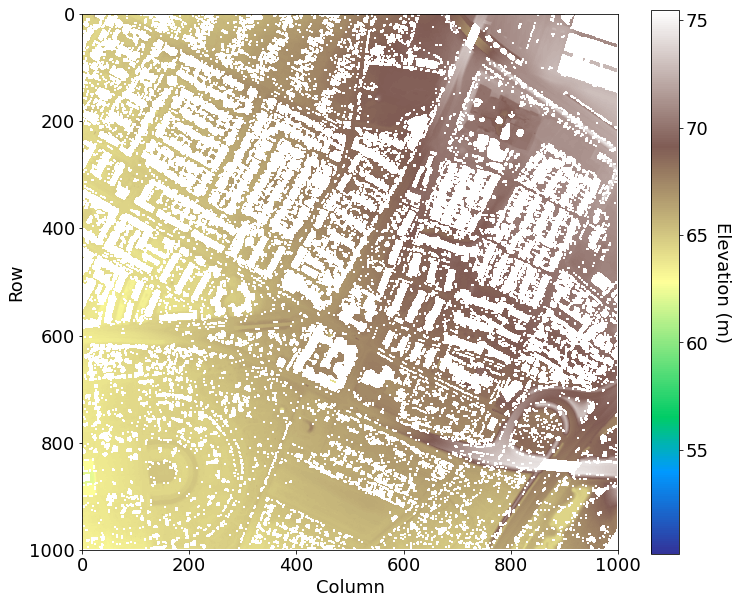

In [16]:
plot_dem(dem, (12, 10))

The following function works as the function above.<br>
But as a difference this functions retruns a DataFrame instead of a numpy array. <br> This makes interpolation and preprocessing easier.

In [17]:
def dataframe_to_df_dem(point_df, cell_size):
    # Calculate the minimum and maximum X and Y coordinates in the point cloud
    min_x, max_x = point_df['X'].min(), point_df['X'].max()
    min_y, max_y = point_df['Y'].min(), point_df['Y'].max()
    
    # Calculate the number of columns and rows in the DEM grid based on the cell size
    num_cols = int(np.ceil((max_x - min_x) / cell_size))
    num_rows = int(np.ceil((max_y - min_y) / cell_size))
    
    # Generate arrays of cell boundaries for X and Y
    x_cell = np.linspace(min_x, max_x, num_cols)
    y_cell = np.linspace(min_y, max_y, num_rows)
    
    # Calculate the cell indices of each point in the point cloud
    x_indices = np.digitize(point_df['X'], x_cell) - 1
    y_indices = np.digitize(point_df['Y'], y_cell) - 1
    
    # Initialize an array to store the accumulated Z-values and counts for each cell
    dem = np.zeros((num_rows, num_cols), dtype=np.float32)
    counts = np.zeros((num_rows, num_cols), dtype=np.int32)
    
    # Accumulate the Z-values and counts for each cell using vectorized operations
    np.add.at(dem, (y_indices, x_indices), point_df['Z'])
    np.add.at(counts, (y_indices, x_indices), 1)
    
    # Divide the accumulated Z-values by the counts to calculate the mean Z-value for each cell
    dem /= counts
    
    
    grid_x, grid_y = np.meshgrid(x_cell, y_cell)
    
    df_dem = pd.DataFrame({'X': grid_x.flatten(), 'Y': grid_y.flatten(), 'Z': dem.flatten()})
    
    return df_dem


Calculate the DEM as a DataFrame.

In [18]:
df_dem = dataframe_to_df_dem(df, 1)
df_dem

C:\Users\Markus\AppData\Local\Temp/ipykernel_19732/4153661910.py:27: RuntimeWarning: invalid value encountered in true_divide
  dem /= counts


,X,Y,Z
0,554000.000000,5798000.000,64.262001
1,554001.000969,5798000.000,64.278496
2,554002.001938,5798000.000,64.319000
3,554003.002907,5798000.000,64.329750
4,554004.003876,5798000.000,64.370598
...,...,...,...
999995,554995.964124,5798999.749,NaN
999996,554996.965093,5798999.749,NaN
999997,554997.966062,5798999.749,NaN
999998,554998.967031,5798999.749,NaN


Drop Missing Values

In [19]:
df_dem = df_dem.dropna()
print('Shape of DataFrame after NaN-Values were droped:', df_dem.shape)

Shape of DataFrame after NaN-Values were droped: (825946, 3)


## Save DEM as Image
Following function saves the calculated DEM as an PNG-images.

In [20]:
from PIL import Image as im

In [21]:
def save_dem_as_image(dem):

    # above array
    data = im.fromarray(dem)

    # saving the final output 
    # as a PNG file
    data.save('dem_' +str(cellsize)+'m.png')

## Interpolation
For the interpolation we use SciPy Interpolate.<br>
First we need the z-coordinate as numpy array.

In [22]:
z = df_dem.Z.to_numpy()
z

array([64.262   , 64.278496, 64.319   , ..., 67.074   , 67.299   ,
       67.77    ], dtype=float32)

In additionwe need the X- and Y-coordinate as numpy array.

In [23]:
xy = df_dem.drop('Z', axis=1).to_numpy()
xy

array([[ 554000.        , 5798000.        ],
       [ 554001.00096897, 5798000.        ],
       [ 554002.00193794, 5798000.        ],
       ...,
       [ 554759.73544745, 5798999.749     ],
       [ 554937.90792392, 5798999.749     ],
       [ 554957.9273033 , 5798999.749     ]])

### Generate a grid
Now we want to generate the DEM-grid again. <br> For this purpose we use `Scipy Griddata`.

In [24]:
X = np.linspace(min_x, max_x, num_cols)
Y = np.linspace(min_y, max_y, num_rows)

grid_x, grid_y = np.meshgrid(X, Y)

Import the `Scipy Griddata`

In [25]:
from scipy.interpolate import griddata

### Use linear interpolation
Now we use the griddata-objekt to interpolate the z-coors.<br>
As an input the griddata uses the points `xy`, the values `z` and the 2D array with the points at which we want to interpolate the data `grid_x`,`grid_y`

In [26]:
grid_lin = griddata(xy, z, (grid_x, grid_y), method='linear')
grid_lin

array([[64.26200104, 64.27849579, 64.31900024, ...,         nan,
                nan,         nan],
       [64.24000549, 64.31739807, 64.33599854, ...,         nan,
                nan,         nan],
       [64.27679443, 64.30125427, 64.32424927, ...,         nan,
                nan,         nan],
       ...,
       [63.27075195, 63.18574905, 63.23199844, ...,         nan,
                nan,         nan],
       [63.18722153, 63.19599915, 63.17512512, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])

## Show results of interpoaltion
Now we want to see the results of the linear interpolation.<br>
As we can see, the image has still NaN values in it - especially in the corners.

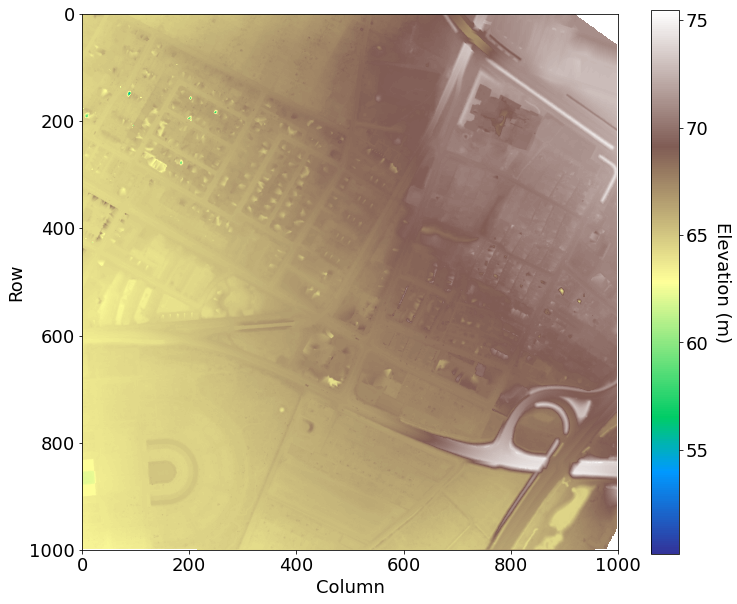

In [27]:
plot_dem(grid_lin, (12, 10))

### Nearest Neighbor Interpolation for Missing Values
To get rid of the last NaN-values we use the nearest neighbour interpolation.

In [28]:
df_intp = pd.DataFrame({'X': grid_x.flatten(), 'Y': grid_y.flatten(), 'Z': grid_lin.flatten()}).dropna()
df_intp

,X,Y,Z
0,554000.000000,5798000.000,64.262001
1,554001.000969,5798000.000,64.278496
2,554002.001938,5798000.000,64.319000
3,554003.002907,5798000.000,64.329750
4,554004.003876,5798000.000,64.370598
...,...,...,...
999953,554953.923427,5798999.749,67.675798
999954,554954.924396,5798999.749,67.699348
999955,554955.925365,5798999.749,67.722897
999956,554956.926334,5798999.749,67.746447


In [29]:
dem_intp = griddata(df_intp.drop('Z', axis=1), df_intp.Z, (grid_x, grid_y), method='nearest')
np.min(dem_intp)

50.15800094604492

Now visulaize the final DEM.

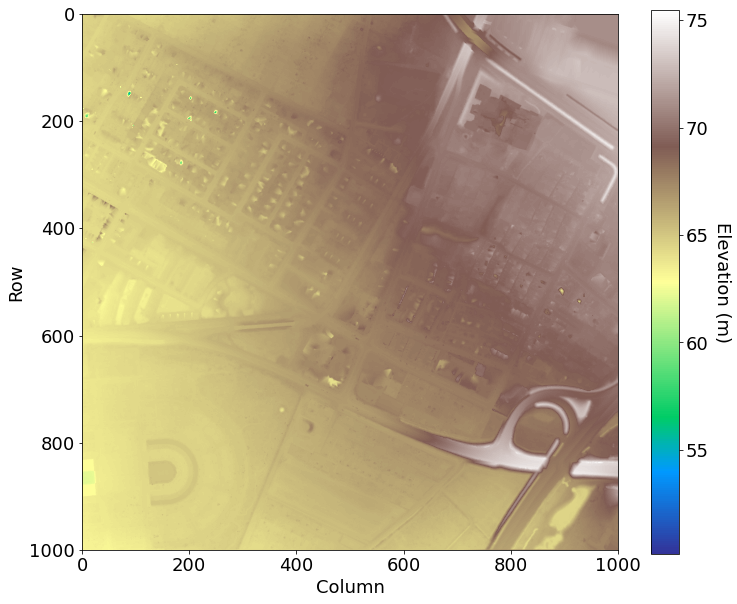

In [30]:
plot_dem(dem_intp, (12, 10))

## Save Results as csv-file
We will export the calculated DEM as an CSV files.

First we need to define the output path.

In [31]:
# '../Daten/Datensatz_H3D/ALS_2016/554000_5798000.las'
csv_filepath = data_path + 'DEM/' + file.split('/')[-1].replace('.las', '') + '.csv'
csv_filepath

'../../Daten/Datensatz_H3D/DEM/554000_5798000.csv'

Now we will save the DataFrame with the calculated DEM. <br>
We have the choice between two different save modes:
- Mode 1: Save DataFrame with shape (number rows * number columns, 3) with the Arributes X-, Y- and Z-coordinate
- Mode 2: save DataFrame with size (number rows, number columns) with Attributs = x-coordinates and index = y-coordinates

In [32]:
# save_mod = 1 -> save DataFrame with size (num_rows * num_columns, 3) with Attributs = XYZ
# save_mod = 2 -> save DataFrame with size (num_rows, num_columns) with Attributs = x-coords and index = y-coords

save_mode = 1

if save_mode == 1:
    pd.DataFrame({'X': grid_x.flatten(), 'Y': grid_y.flatten(), 'Z': dem_intp.flatten()}).to_csv(csv_filepath, sep='\t')

elif save_mode == 2:
    result_df = pd.DataFrame(dem_intp, index=Y, columns=X)
    result_df.index.name = 'Y'
    result_df.to_csv(csv_filepath, sep='\t')